# Airline On-Time Performance Data Exploratory Analysis
## Introduction
Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out. 

The data: The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigab ytes when uncompressed. The data comes originally from RITA where it is described in detail.

Variable descriptions: 

S/N | Name | Description 
-- | -- | --
1 | `Year` | 1987-2008 (2007 for this analysis)
2 | `Month` | 1-12 
3 | `DayofMonth` | 1-31 
4 | `DayOfWeek` | 1 (Monday) - 7 (Sunday) 
5 | `DepTime` | actual departure time (local, hhmm) 
6 | `CRSDepTime` | scheduled departure time (local, hhmm) 
7 | `ArrTime` | actual arrival time (local, hhmm) 
8 | `CRSArrTime` | scheduled arrival time (local, hhmm) 
9 | `UniqueCarrier` | unique carrier code 
10 | `FlightNum` | flight number 
11 | `TailNum` | plane tail number 
12 | `ActualElapsedTime` | actual elapsed time in minutes 
13 | `CRSElapsedTime` | scheduled elapsed time in minutes 
14 | `AirTime` | the time from the moment an aircraft leaves the surface until it comes into contact with the surface at the next point of landing;,in minutes 
15 | `ArrDelay` | arrival delay, in minutes 
16 | `DepDelay` | departure delay, in minutes 
17 | `Origin` | origin, IATA airport code 
18 | `Dest` | destination, IATA airport code 
19 | `Distance` | distance covered, in miles 
20 | `TaxiIn` | taxi in time, in minutes 
21 | `TaxiOut` | taxi out time in minutes 
22 | `Cancelled` | was the flight cancelled? 
23 | `CancellationCode` | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) 
24 | `Diverted` | 1 = yes, 0 = no 
25 | `CarrierDelay` | delay within air carrier's control, in minutes 
26 | `WeatherDelay` | delay caused by extreme weather conditions, in minutes 
27 | `NASDelay` | delay within the NAS control, in minutes 
28 | `SecurityDelay` | delay due to security checks, breach or faulty security equipment, in minutes 
29 | `LateAircraftDelay` | delay due to the late arrival of the same aircraft at a previous airport, in minutes

* The International Air Transport Association's (IATA) Location Identifier is a unique 3-letter code (also commonly known as IATA code) used in aviation and also in logistics to identify an airport.
* A computer reservation system or a central reservation system (CRS) is a web-based software used by travel agencies and travel management companies to retrieve and conduct transactions related to air travel, hotels, car rental, or other activities. 

**Questions of Interest for the 2007 data**
* When is the best time of day/day of week/time of year to fly to minimise delays?
* Do older planes suffer more delays?
* How does the number of people flying between different locations change over time?
* How well does weather predict plane delays?
* Can you detect cascading failures as delays in one airport create delays in others? Are there critical links in the system?

Importing important libraries

In [1]:
# import modules and libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calplot

pd.set_option('display.max.columns', 500)
plt.style.use('seaborn-dark-palette')
%matplotlib inline

c:\Users\Cyriaque Matthews\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
airline_df = pd.read_csv('airline_clean.csv')
airports = pd.read_csv('airports.csv')
planes_data = pd.read_csv('plane_clean.csv')
carriers = pd.read_csv('carriers.csv')

In [3]:
airline_df['Date'] = pd.to_datetime(airline_df['Date'])

In [4]:
cat_cols = ['UniqueCarrier', 'FlightNum', 'Origin', 'Dest']

for col in cat_cols:
      airline_df[col] = airline_df[col].astype('category')

In [5]:
airline_df.head()

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007-01-01,1232.0,1225,1341.0,1340,WN,2891,1.0,7.0,SMF,ONT,389,4,11,False,NaN,False,0,0,0,0,0
1,2007-01-01,1918.0,1905,2043.0,2035,WN,462,8.0,13.0,SMF,PDX,479,5,6,False,NaN,False,0,0,0,0,0
2,2007-01-01,2206.0,2130,2334.0,2300,WN,1229,34.0,36.0,SMF,PDX,479,6,9,False,NaN,False,3,0,0,0,31
3,2007-01-01,1230.0,1200,1356.0,1330,WN,1355,26.0,30.0,SMF,PDX,479,3,8,False,NaN,False,23,0,0,0,3
4,2007-01-01,831.0,830,957.0,1000,WN,2278,-3.0,1.0,SMF,PDX,479,3,9,False,NaN,False,0,0,0,0,0


In [6]:
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453188 entries, 0 to 7453187
Data columns (total 22 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Date               datetime64[ns]
 1   DepTime            float64       
 2   CRSDepTime         int64         
 3   ArrTime            float64       
 4   CRSArrTime         int64         
 5   UniqueCarrier      category      
 6   FlightNum          category      
 7   ArrDelay           float64       
 8   DepDelay           float64       
 9   Origin             category      
 10  Dest               category      
 11  Distance           int64         
 12  TaxiIn             int64         
 13  TaxiOut            int64         
 14  Cancelled          bool          
 15  CancellationCode   object        
 16  Diverted           bool          
 17  CarrierDelay       int64         
 18  WeatherDelay       int64         
 19  NASDelay           int64         
 20  SecurityDelay      int64

## Data Exploration

### Understanding the `DepDelay` variable

In [7]:
base_color = sns.color_palette()[5]

In [8]:
airline_df.DepDelay.min()

-305.0

In [9]:
airline_df.DepDelay.max()

2601.0

In [10]:
airline_df.query('DepDelay < 0').head(15)

,Date,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
13,2007-01-01,935.0,940,1048.0,1105,WN,747,-17.0,-5.0,SMF,SAN,480,2,8,False,NaN,False,0,0,0,0,0
24,2007-01-01,715.0,720,836.0,845,WN,2755,-9.0,-5.0,SMF,SAN,480,2,14,False,NaN,False,0,0,0,0,0
32,2007-01-01,731.0,735,844.0,900,WN,1488,-16.0,-4.0,SMF,SNA,404,5,8,False,NaN,False,0,0,0,0,0
35,2007-01-01,946.0,950,1100.0,1115,WN,2806,-15.0,-4.0,SMF,SNA,404,3,11,False,NaN,False,0,0,0,0,0
42,2007-01-01,1714.0,1715,1835.0,1835,WN,1737,0.0,-1.0,SNA,OAK,371,13,5,False,NaN,False,0,0,0,0,0
53,2007-01-01,921.0,925,1119.0,1140,WN,1488,-21.0,-4.0,SNA,PHX,338,4,5,False,NaN,False,0,0,0,0,0
59,2007-01-01,829.0,835,940.0,950,WN,528,-10.0,-6.0,SNA,SJC,342,3,6,False,NaN,False,0,0,0,0,0
64,2007-01-01,1638.0,1640,1749.0,1755,WN,2299,-6.0,-2.0,SNA,SJC,342,4,6,False,NaN,False,0,0,0,0,0
65,2007-01-01,938.0,940,1105.0,1105,WN,654,0.0,-2.0,SNA,SMF,404,4,8,False,NaN,False,0,0,0,0,0
66,2007-01-01,1439.0,1440,1607.0,1605,WN,728,2.0,-1.0,SNA,SMF,404,3,15,False,NaN,False,0,0,0,0,0


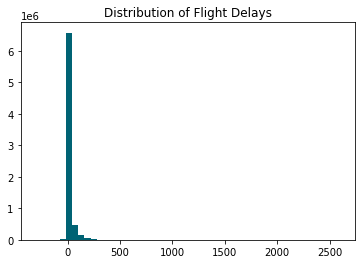

In [11]:
plt.hist(airline_df.DepDelay, bins=50, color=base_color)
plt.title('Distribution of Flight Delays');

The distribution shows a high peak around 0 because most flights aren't delayed. Let's dig a bit deeper.

In [12]:
airline_df.DepDelay.value_counts().head(10)

 0.0    626236
-5.0    520603
-3.0    511311
-2.0    508707
-4.0    477747
-1.0    474151
-6.0    285009
 1.0    250564
-7.0    214359
 2.0    188005
Name: DepDelay, dtype: int64

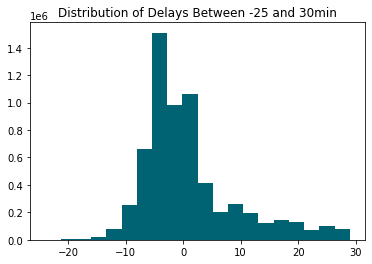

In [13]:
plotdata = airline_df.query('DepDelay < 30 & DepDelay > -25')['DepDelay']

# plot
plt.hist(plotdata, bins=20, color=base_color)
plt.title('Distribution of Delays Between -25 and 30min');

Plot shows a normal distribution with majority of the flights being early. Let's ignore early and on-time flights and look at the delays

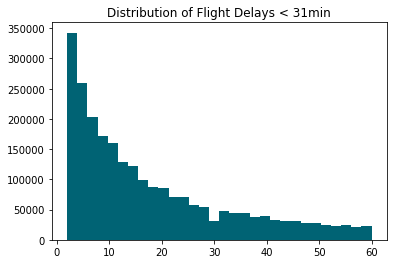

In [14]:
plotdata = airline_df.query('DepDelay > 1 & DepDelay < 61')['DepDelay']

# plot
plt.hist(plotdata, bins=30, color=base_color)
plt.title('Distribution of Flight Delays < 31min');

From the plot, it's obvious that the frequency of delays with increasing amount.

### Grouping of Delays
Delays are divided into three categories, namely "On time or small delay" (up to 15 minutes delay), "Medium delay" (15 - 45 minutes delay) and "Large delay" (45 minutes delay).

[source](https://en.wikipedia.org/wiki/Flight_cancellation_and_delay#Performances)

In [15]:
# creating new column to hold group
airline_df['DelayGroup'] = None

# filling column with values based on delay duration
airline_df.loc[airline_df['DepDelay'] <= 0, 'DelayGroup'] = "OnTime_Early"
airline_df.loc[(airline_df['DepDelay'] > 0) & (airline_df['DepDelay'] <= 15), 'DelayGroup'] = "Small_Delay"
airline_df.loc[(airline_df['DepDelay'] > 15) & (airline_df['DepDelay'] <= 45), 'DelayGroup'] = "Medium_Delay"
airline_df.loc[airline_df['DepDelay'] > 45, 'DelayGroup'] = "Large_Delay"
airline_df.loc[airline_df['Cancelled'], 'DelayGroup'] = "Cancelled"

In [16]:
airline_df.DelayGroup.isna().sum()

0

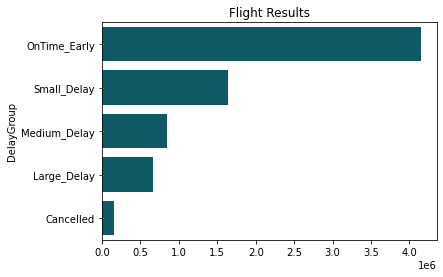

In [17]:
# plot countplot
sns.countplot(y=airline_df.DelayGroup, color=base_color,
              order=airline_df.DelayGroup.value_counts().index)
plt.title('Flight Results')
plt.xlabel('');

### What is the Amount of Flights Per Month?

In [18]:
# get the first 3 letters of the month name for each date
airline_df['Month'] = airline_df['Date'].dt.month_name().str.slice(stop=3)

month = airline_df.Month.unique()
monthClass = pd.api.types.CategoricalDtype(categories=month, ordered=True)
airline_df['Month'] = airline_df['Month'].astype(monthClass)

In [19]:
plotdata = airline_df.groupby('Month')["Date"].count()
plotdata

Month
Jan    621557
Feb    565604
Mar    639209
Apr    614648
May    631609
Jun    629280
Jul    648544
Aug    653276
Sep    600186
Oct    629990
Nov    605148
Dec    614137
Name: Date, dtype: int64

In [20]:
plotdata.median()

625418.5

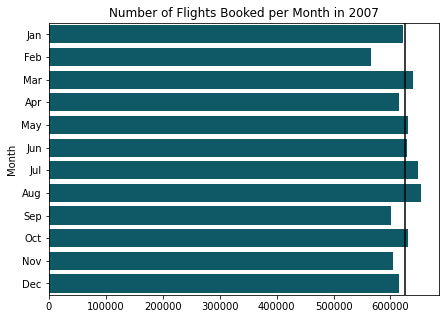

In [21]:
# bar plot
plt.figure(figsize=[7,5])
sns.barplot(y=plotdata.index, x=plotdata.values,
            color=base_color)
plt.axvline(x=plotdata.median(), color='black')
plt.title('Number of Flights Booked per Month in 2007');

Although the median number of bookings seems to be above 600,000 in 2007, February seems to have the least amount of flight bookings while July and August have the most.

### What is the % of Flight Results by Month for 2007

In [22]:
# normalize=True, gets the proportion of each value by the row.
airline_df_agg = airline_df.groupby('Month')['DelayGroup'].value_counts(normalize=True).unstack()

# sorting columns
airline_df_agg = airline_df_agg[['OnTime_Early', 'Small_Delay', 'Medium_Delay',
                                 'Large_Delay', 'Cancelled']]

In [23]:
airline_df_agg*100

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
Jan,56.310684,21.386615,11.532008,8.232391,2.538303
Feb,49.655059,22.461652,13.199341,10.181682,4.502267
Mar,54.140508,22.615921,11.691012,8.912265,2.640294
Apr,57.661133,22.059781,10.485351,7.981642,1.812094
May,60.649706,21.661186,9.766960,6.839041,1.083107
Jun,48.317283,24.143942,13.026951,11.771707,2.740116
Jul,50.449160,23.540114,12.913388,11.014827,2.082511
Aug,52.421029,23.134479,12.415732,10.146707,1.882053
Sep,66.323440,18.665047,8.147641,5.779708,1.084164


In [24]:
airline_df_agg.sum(axis=1)

Month
Jan    1.0
Feb    1.0
Mar    1.0
Apr    1.0
May    1.0
Jun    1.0
Jul    1.0
Aug    1.0
Sep    1.0
Oct    1.0
Nov    1.0
Dec    1.0
dtype: float64

Let's get the percentage of each delay group for each month

In [25]:
(airline_df_agg*100).style.background_gradient(cmap='Blues', axis=1)

DelayGroup,OnTime_Early,Small_Delay,Medium_Delay,Large_Delay,Cancelled
Month,,,,,
Jan,56.310684,21.386615,11.532008,8.232391,2.538303
Feb,49.655059,22.461652,13.199341,10.181682,4.502267
Mar,54.140508,22.615921,11.691012,8.912265,2.640294
Apr,57.661133,22.059781,10.485351,7.981642,1.812094
May,60.649706,21.661186,9.766960,6.839041,1.083107
Jun,48.317283,24.143942,13.026951,11.771707,2.740116
Jul,50.449160,23.540114,12.913388,11.014827,2.082511
Aug,52.421029,23.134479,12.415732,10.146707,1.882053
Sep,66.323440,18.665047,8.147641,5.779708,1.084164


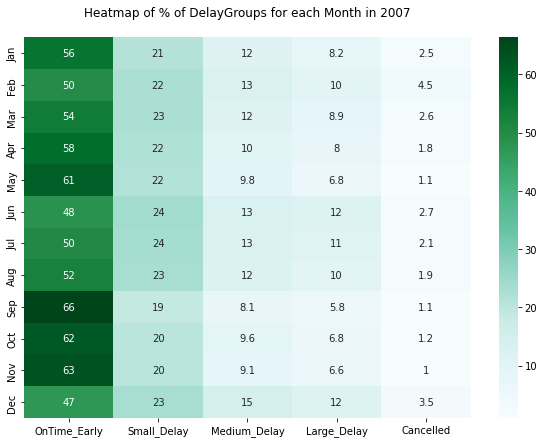

In [94]:
plt.figure(figsize=[10,7])
sns.heatmap((airline_df_agg*100), cmap='BuGn', annot=True)
plt.title('Heatmap of % of DelayGroups for each Month in 2007\n')
plt.xlabel('')
plt.ylabel('');

We can see the gradual decrease in percentage of delays for each month. Let's look at a heatmap neglecting the OnTime_Flights

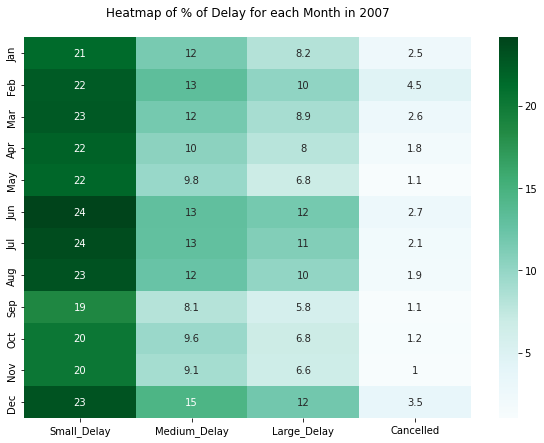

In [92]:
plt.figure(figsize=[10,7])
sns.heatmap((airline_df_agg.drop('OnTime_Early', axis=1)*100), 
            cmap='BuGn', annot=True)
plt.title('Heatmap of % of Delay for each Month in 2007\n')
plt.xlabel('')
plt.ylabel('');

Most delays occurred between June, July, August and December while September to November had the highest percentage of on time flights. February then December saw the highest percentage of cancelled flights than all other months in 2007.

### How many flights were cancelled daily in 2007?

In [28]:
# get the daily number of cancelled flights.
# remember True=1 and False=0
cancelled_per_day = airline_df.groupby('Date')['Cancelled'].sum()

In [29]:
cancelled_per_day

Date
2007-01-01    359
2007-01-02    211
2007-01-03    177
2007-01-04    497
2007-01-05    580
             ... 
2007-12-27    486
2007-12-28    926
2007-12-29    171
2007-12-30    292
2007-12-31    524
Name: Cancelled, Length: 365, dtype: int64

In [30]:
cancelled_per_day.describe()[['min','max']]

min      52.0
max    4385.0
Name: Cancelled, dtype: float64

In [31]:
bins = np.arange(50,4400,250)
bins

array([  50,  300,  550,  800, 1050, 1300, 1550, 1800, 2050, 2300, 2550,
       2800, 3050, 3300, 3550, 3800, 4050, 4300])

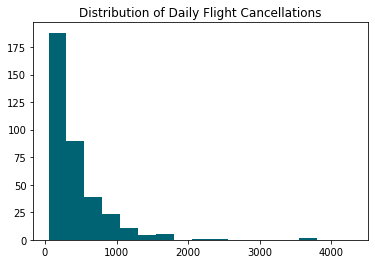

In [32]:
plt.hist(cancelled_per_day, bins=bins, color=base_color)
plt.title('Distribution of Daily Flight Cancellations');

Let's apply a log transform since this data is highly skewed to the right.

In [33]:
cancelled_per_day.describe()[['min','max']]

min      52.0
max    4385.0
Name: Cancelled, dtype: float64

In [34]:
print(np.log10(52))
print(np.log10(4385))

1.7160033436347992
3.6419695977020594


In [35]:
# creating bins
logBin_list = 10 ** np.arange(1.7, 3.7+0.1, 0.1)

In [36]:
logBin_list.round()

array([  50.,   63.,   79.,  100.,  126.,  158.,  200.,  251.,  316.,
        398.,  501.,  631.,  794., 1000., 1259., 1585., 1995., 2512.,
       3162., 3981., 5012., 6310.])

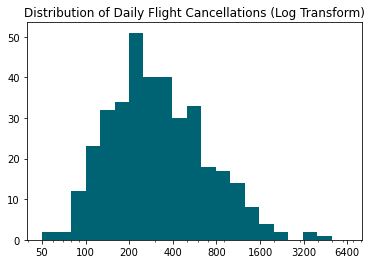

In [37]:
# generate the x-ticks you want to apply
ticks = [50, 100, 200, 400, 800, 1600, 3200, 6400]

# plot the histogram
plt.hist(cancelled_per_day, bins=logBin_list, color=base_color)
plt.xscale('log') # applying log transform [default base 10]

# apply xticks
plt.xticks(ticks, labels=ticks)
plt.title('Distribution of Daily Flight Cancellations (Log Transform)');

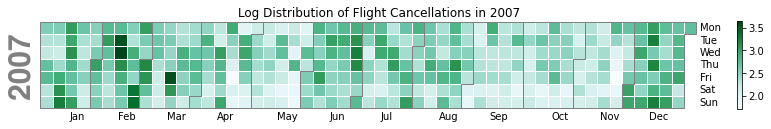

In [95]:
calplot.calplot(np.log10(cancelled_per_day), cmap='BuGn', colorbar=True,
                suptitle='Log Distribution of Flight Cancellations in 2007');

From the plot above, we can see the days and weeks of each month that had the most cancellations.

### Comparing No. of Registered Flights Amongs Airlines
Let's merge the carrier names with the carrier codes

In [39]:
# creating dataframe with just counts of registered flights for each airline
carrier_count = airline_df.groupby('UniqueCarrier')[['DepTime']].count()

# sorting by decreasing count
carrier_count.sort_values('DepTime', ascending=False, inplace=True)

# rename column
carrier_count.rename(columns={'DepTime':'Count'}, inplace=True)

# reseting index, so that `UniqueCarrier` can be a column
carrier_count.reset_index(inplace=True)

In [40]:
carrier_count

,UniqueCarrier,Count
0,WN,1158878
1,AA,615933
2,OO,583696
3,MQ,517702
4,UA,478073
5,US,476505
6,DL,469368
7,XE,423973
8,NW,406712
9,CO,320200


Merging `carriers` with `carrier_count`

In [41]:
airlines_flights = pd.merge(left=carrier_count, right=carriers, how='left', 
                            left_on='UniqueCarrier', right_on='Code')
airlines_flights = airlines_flights[['Code', 'Description', 'Count']]

In [44]:
# converting description of US Airways inc to a shortform
airlines_flights.query("Description == 'US Airways Inc. (Merged with America West 9/05. Reporting for both starting 10/07.)'")

,Code,Description,Count
5,US,US Airways Inc. (Merged with America West 9/05...,476505


In [46]:
airlines_flights.iloc[5,1] = 'US Airways Inc.'

In [57]:
airlines_flights

,Code,Description,Count
0,WN,Southwest Airlines Co.,1158878
1,AA,American Airlines Inc.,615933
2,OO,Skywest Airlines Inc.,583696
3,MQ,American Eagle Airlines Inc.,517702
4,UA,United Air Lines Inc.,478073
5,US,US Airways Inc.,476505
6,DL,Delta Air Lines Inc.,469368
7,XE,Expressjet Airlines Inc.,423973
8,NW,Northwest Airlines Inc.,406712
9,CO,Continental Air Lines Inc.,320200


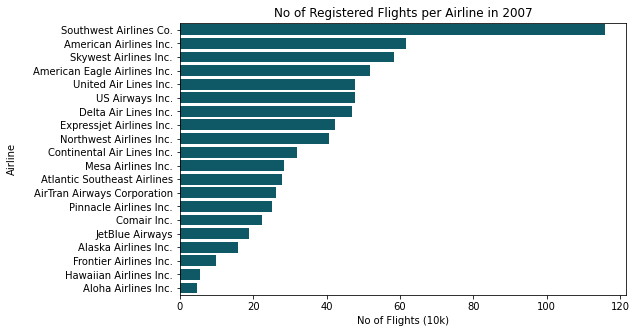

In [62]:
# plot
plt.figure(figsize=[8,5])
sns.barplot(x=(airlines_flights.Count/10000), y=airlines_flights.Description,
            color=base_color)
plt.title('No of Registered Flights per Airline in 2007')
plt.xlabel('No of Flights (10k)')
plt.ylabel('Airline\n');

Southwest Airlines Co. seems to be the most popular airline in 2007 with a total of 1,158,878 registered flights followed by 'American Airlines Inc'. and 'Skywest Airlines Inc'. both having 615,933 and 583,696 registered flights respectively. The least used airline is 'Aloha Airlines Inc.' having just 45,972 booked flights.